# Chapter 04. 시각화 도구

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## 1. Matplotlib - 기본 그래프 도구

In [15]:
# matplotlib 한글 폰트 오류 문제 해결
# from matplotlib import font_manager, rc
# font_path = "./malgun.ttf"   #폰트파일의 위치
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

plt.rcParams["font.family"] = 'AppleGothic'

### 1-2. 면적 그래프

In [16]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [17]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
df_4.head()

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314


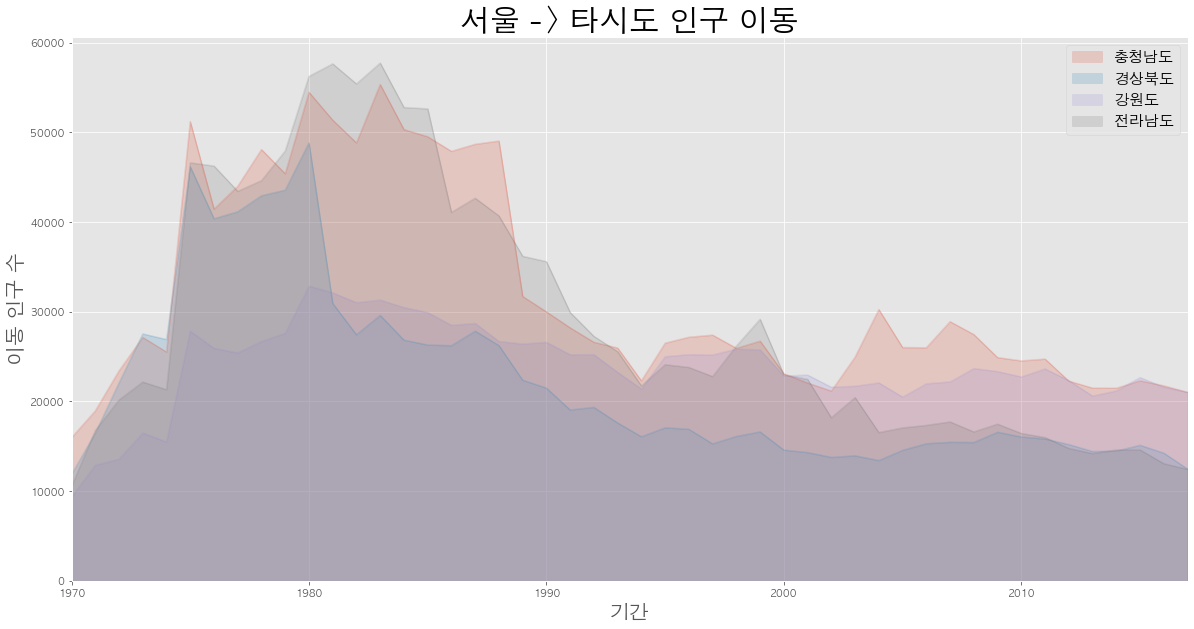

In [21]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

#### axes 객체 속성 변경하기

<class 'matplotlib.axes._subplots.AxesSubplot'>


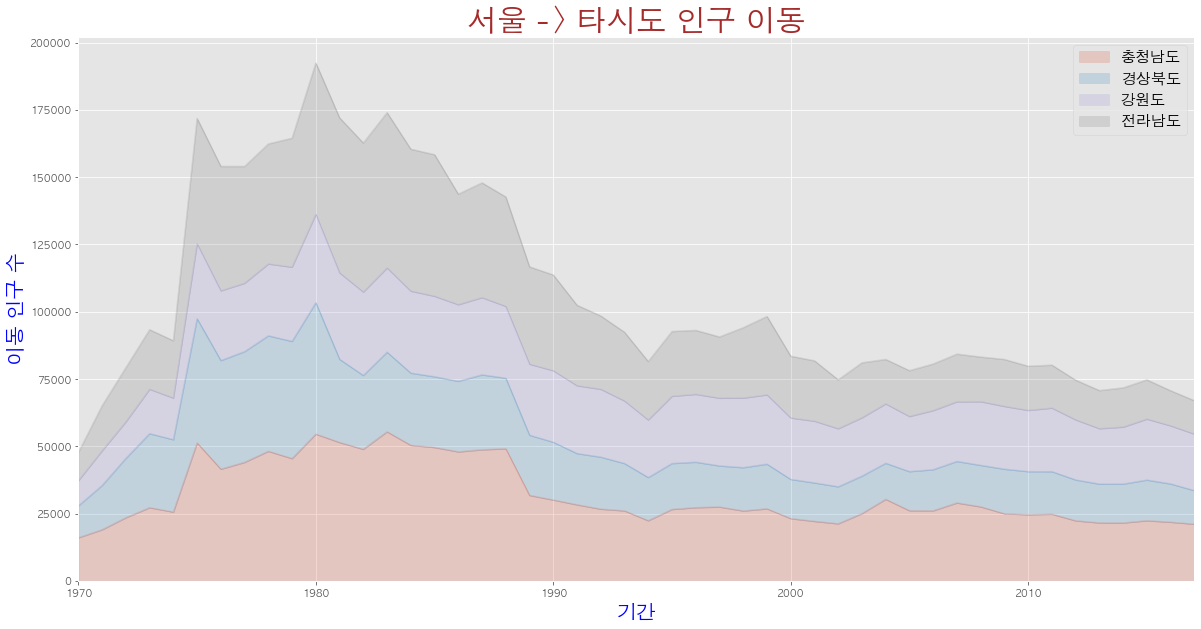

In [24]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 axe 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

### 1-3. 막대 그래프

In [27]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))     
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
df_4.head()

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591


#### 세로 막대 그래프 - 시간의 흐름

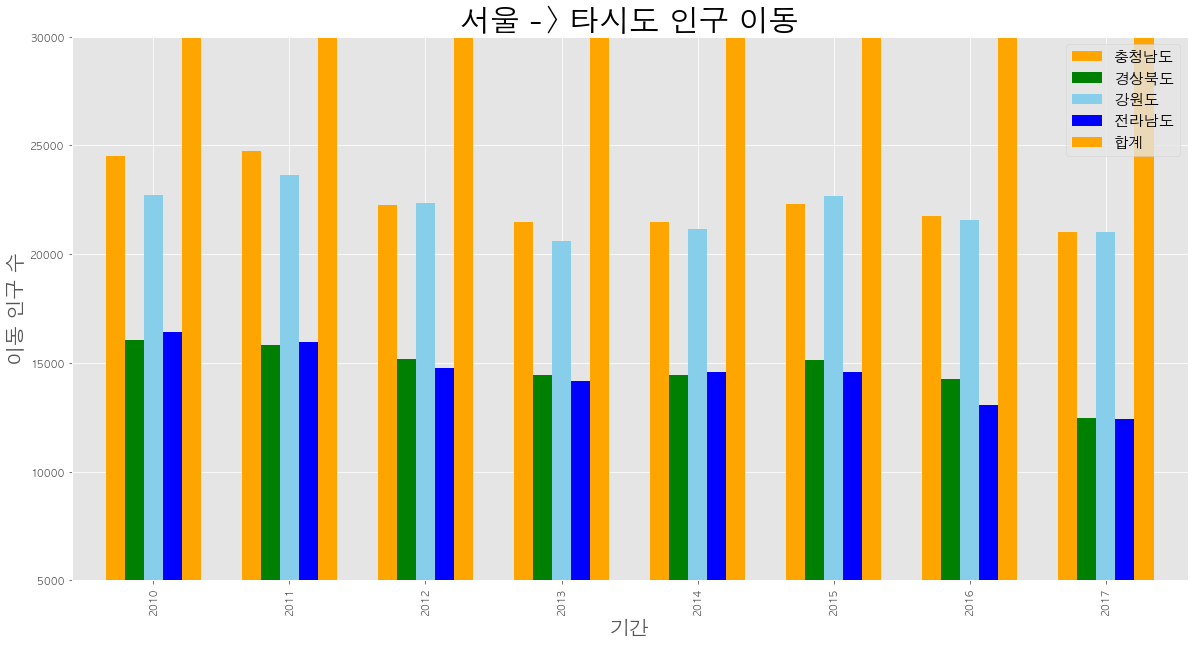

In [33]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

#### 가로 막대 그래프 - 각 데이터 값의 차이

In [34]:
# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)
df_total

전입지,합계
2017,133852.0
2016,141264.0
2013,141388.0
2014,143386.0
2012,149114.0
2015,149338.0
2010,159458.0
2011,160278.0


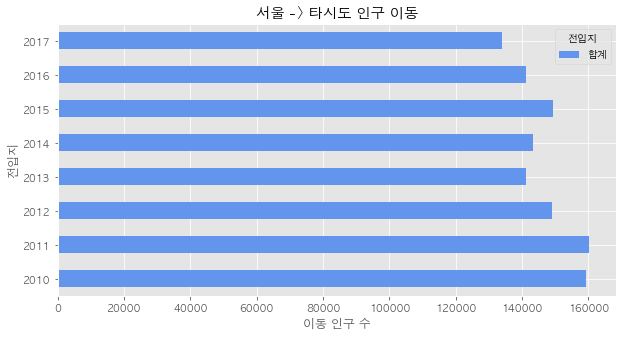

In [39]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 수평 막대 그래프 그리기
df_total.sort_index().plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5), )

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

### 1-4. 히스토그램
* 변수가 하나인 단변수 데이터의 빈도수
* x축을 같은 크기의 여러 구간으로 분항 후 각 구간에 속하는 데이터 값의 개수(빈도)를 표현

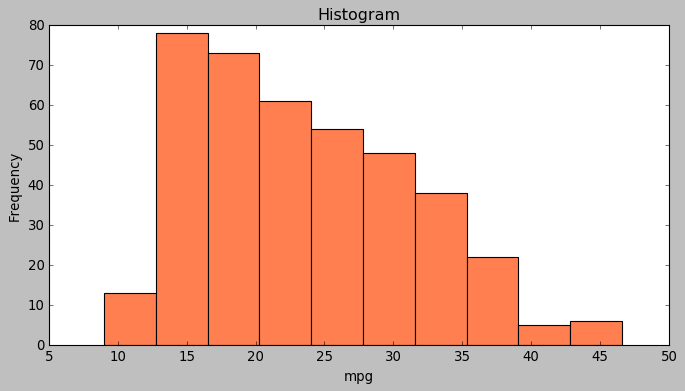

In [40]:
plt.style.use('classic')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

### 1-5. 산점도

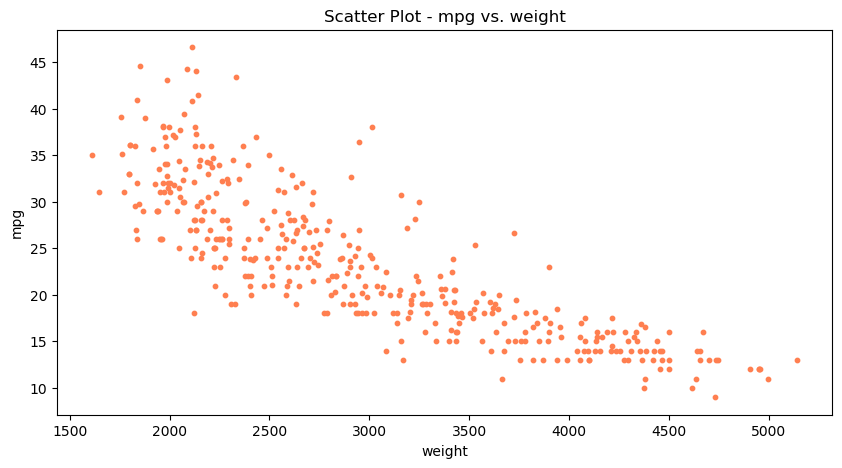

In [46]:
plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

#### 변수 추가

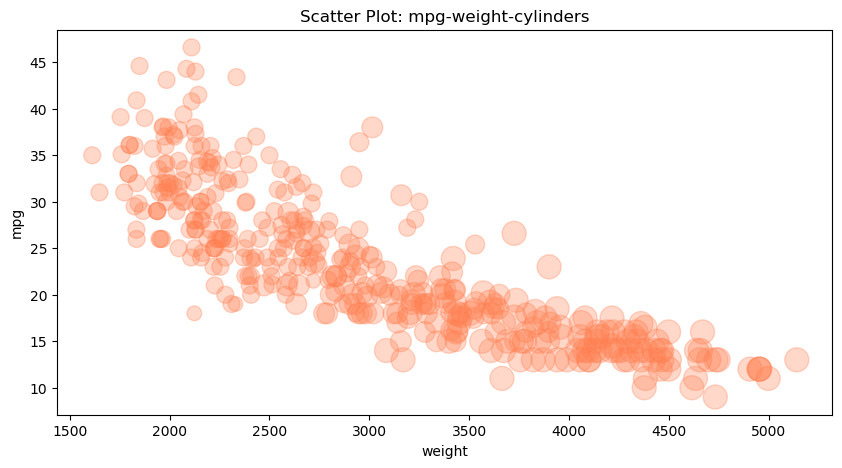

In [48]:
plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

#### 그래프 이미지로 저장

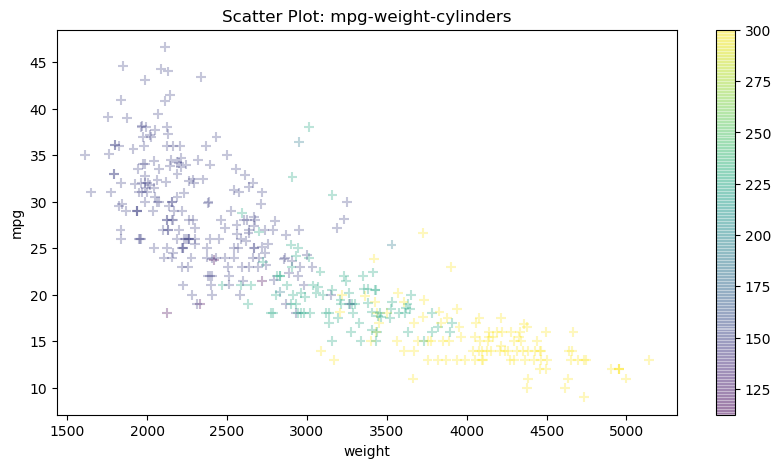

In [70]:
plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")   
plt.savefig("./scatter_transparent.png", transparent=True)   

plt.show()

### 1-6. 파이 차트

In [49]:
# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
df_origin.head()                  # 그룹 연산 결과 출력

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [50]:
# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


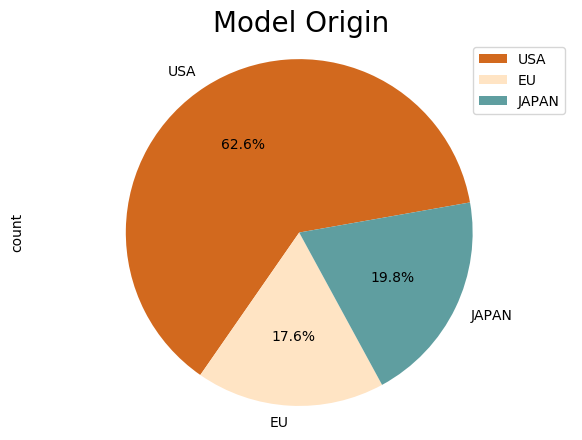

In [51]:
plt.style.use('default')   # 스타일 서식 지정

df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시, formatting
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

### 1-7. 박스 플롯

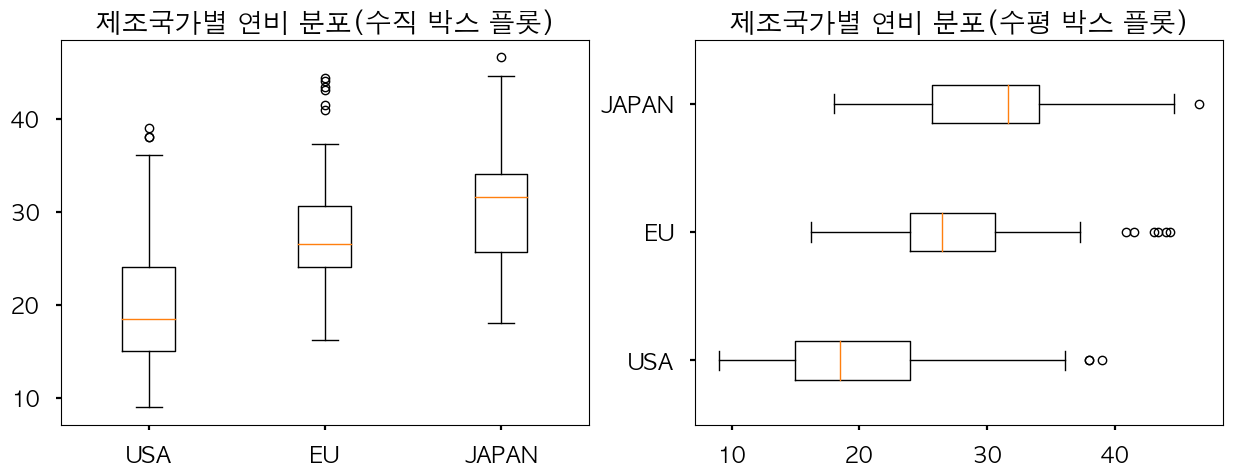

In [61]:
plt.style.use('seaborn-poster')            # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정
plt.rcParams["font.family"] = 'AppleGothic'

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

## 2. Seaborn 라이브러리 - 고급 그래프 도구
* Matplotlib의 기능과 스타일을 확장한 고급 라이브러리

#### 데이터 셋 가져오기

In [67]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age      

### 회귀선이 있는 산점도

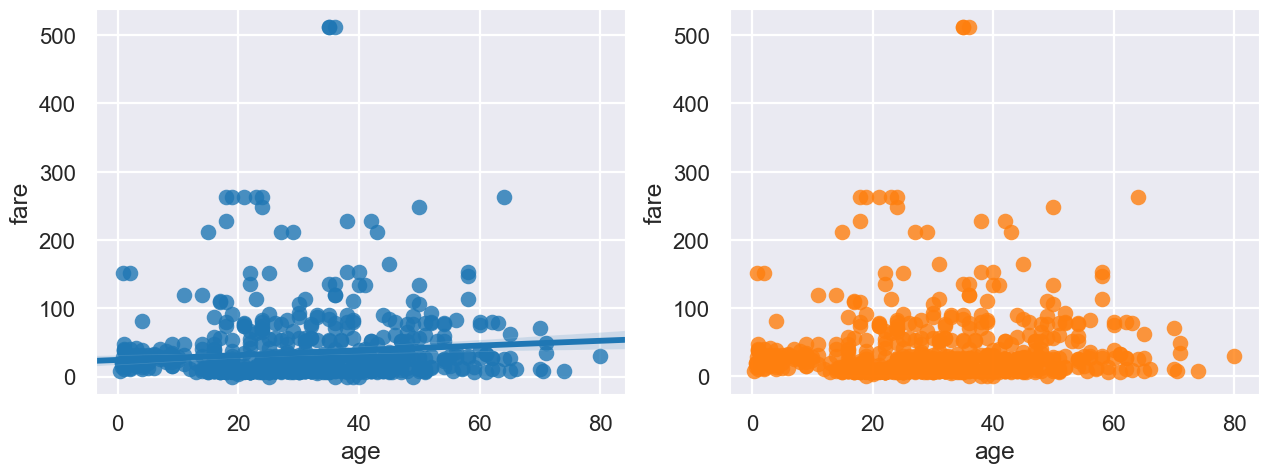

In [76]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax1)         #axe 객체 - 1번째 그래프 

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax2,         #axe 객체 - 2번째 그래프        
            fit_reg=False)  #회귀선 미표시

plt.show()

### 히스토그램/커널 밀도 그래프

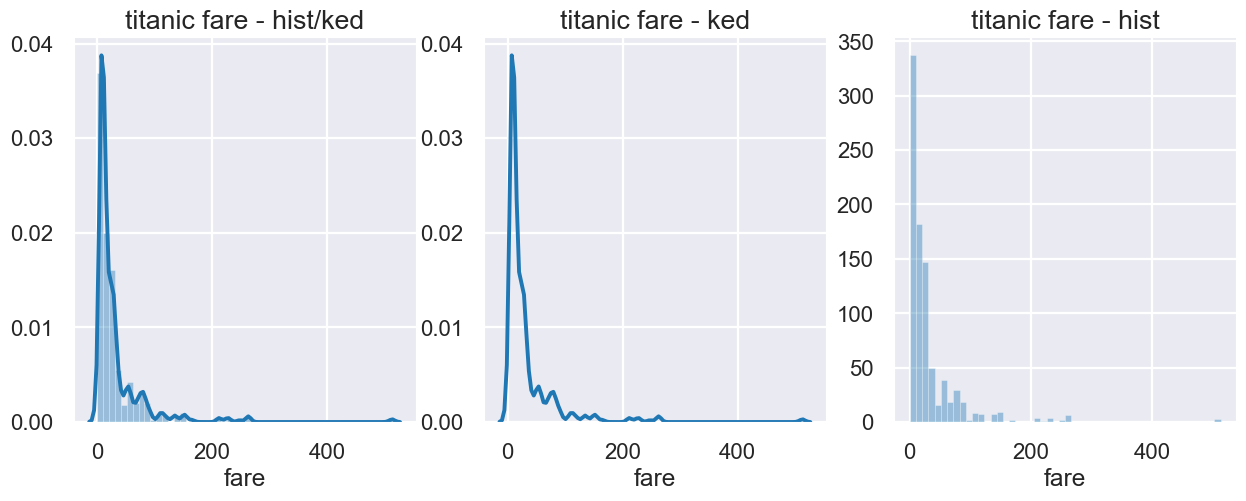

In [70]:
import seaborn as sns
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.distplot(titanic['fare'], ax=ax1) 

# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2) 

# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3)        

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

### 히트맵

In [75]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='sizw')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


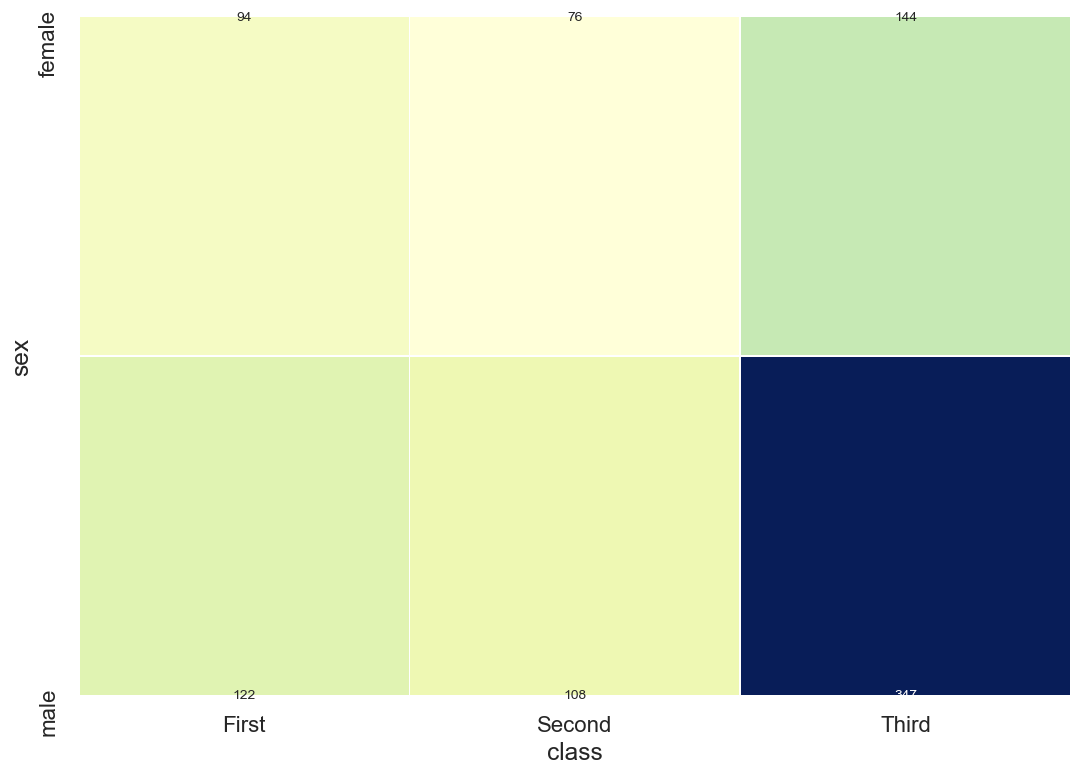

In [87]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False)             # 컬러 바 표시 여부

plt.show()

### 범주형 데이터의 산점도

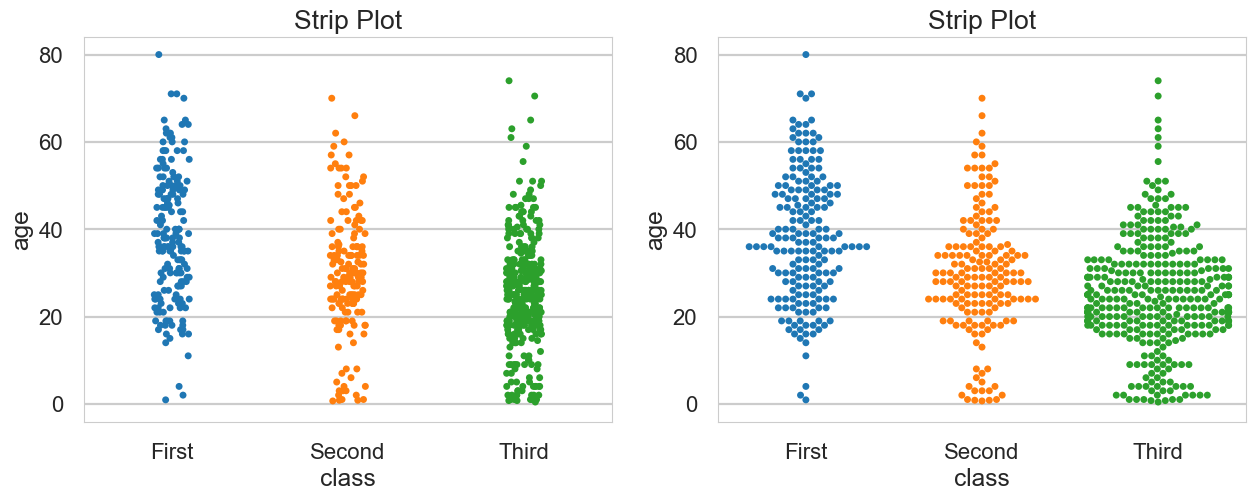

In [88]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class",      #x축 변수
              y="age",        #y축 변수           
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax1)         #axe 객체 - 1번째 그래프 

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="class",      #x축 변수
              y="age",        #y축 변수
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax2)         #axe 객체 - 2번째 그래프        

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

### 막대 그래프    

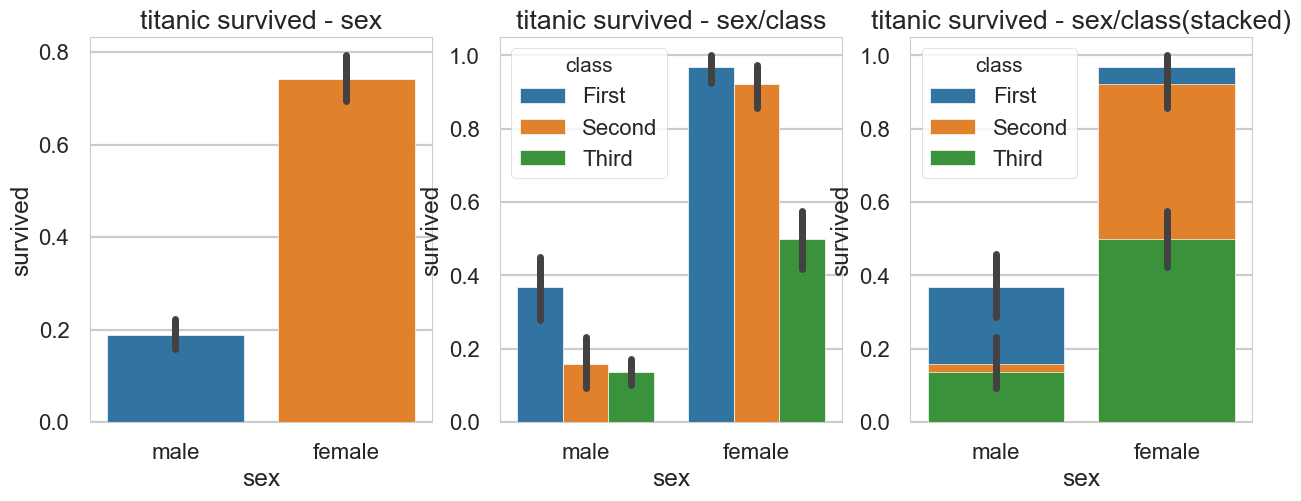

In [89]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

### 빈도 그래프

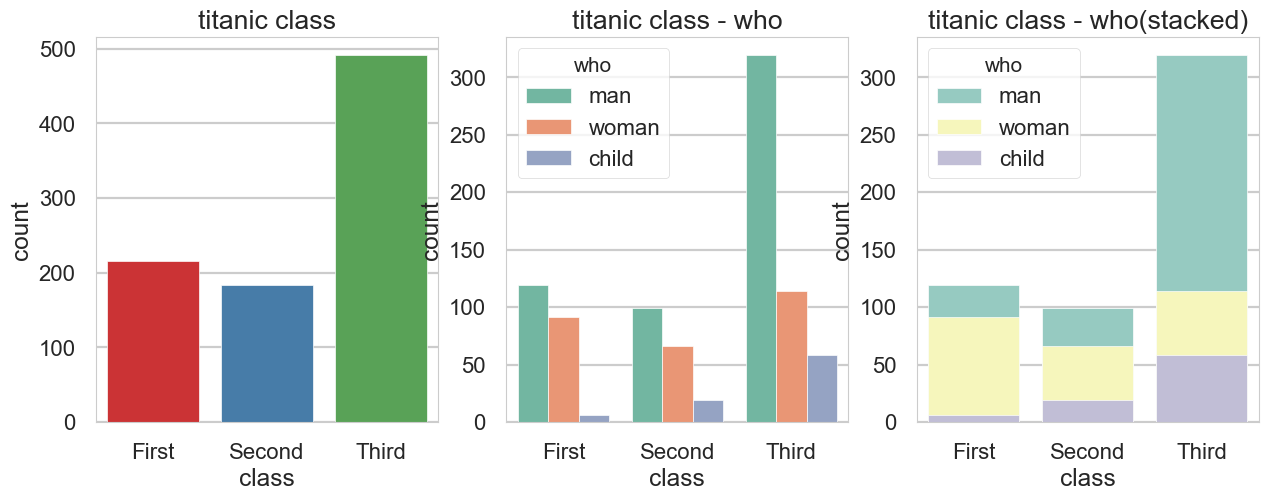

In [91]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2) 

# dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

### 박스 플롯/바이올린 그래프

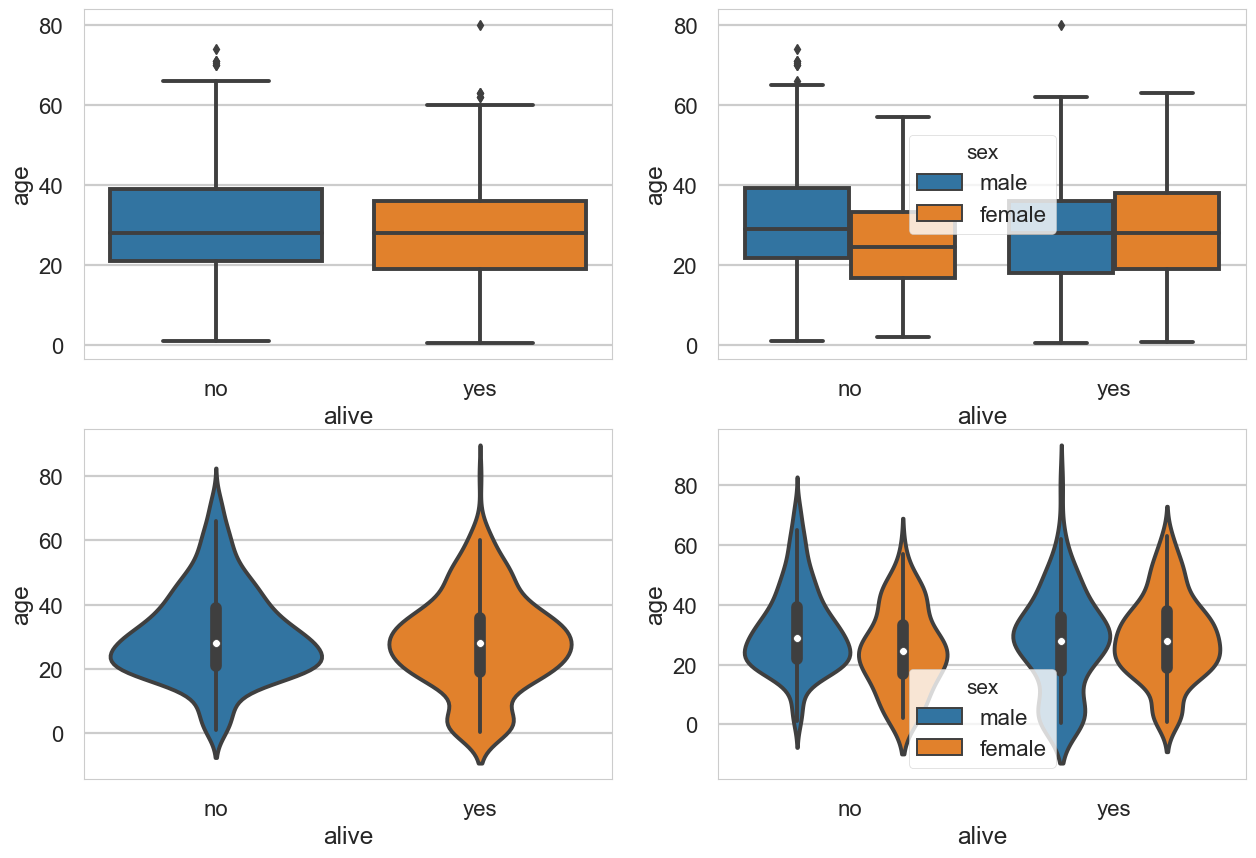

In [92]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
 
# 박스 그래프 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1) 

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2) 

# 박스 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3) 

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4) 

plt.show()

### 조인트 그래프

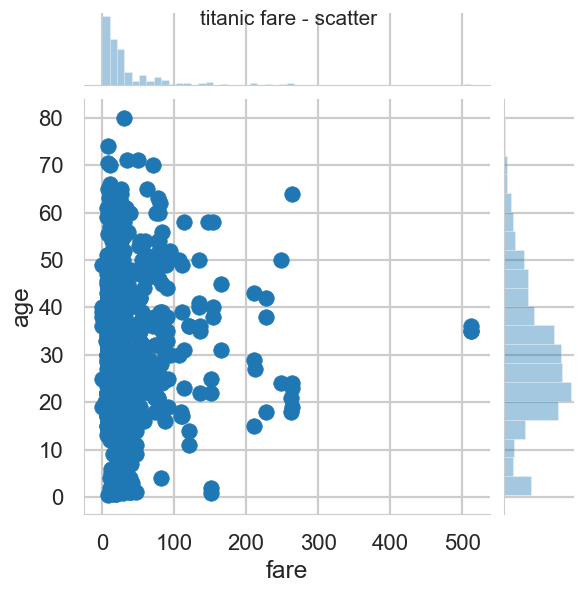

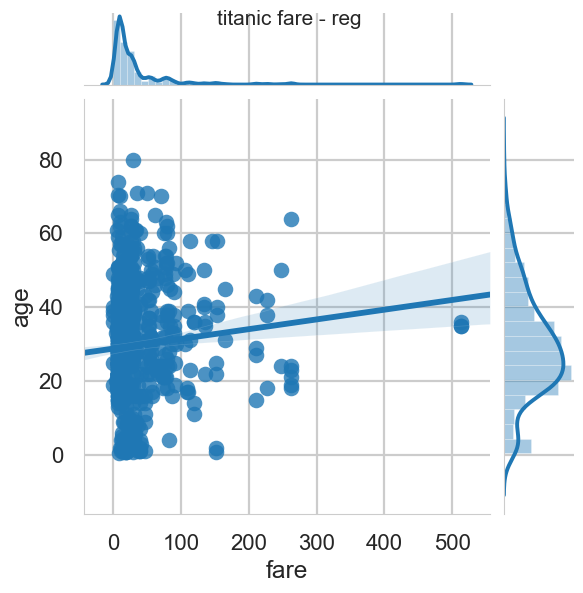

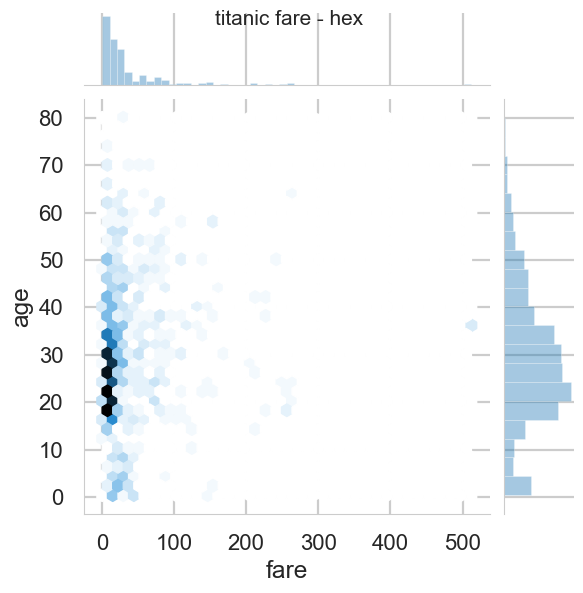

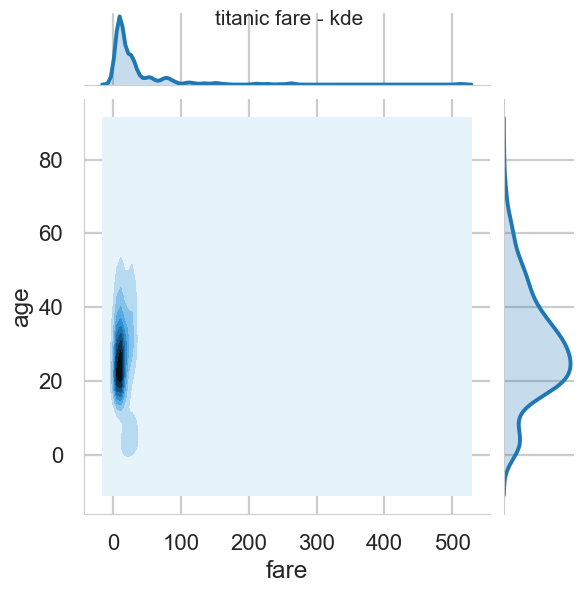

In [93]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic) 

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) 

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) 

# 조인트 그래프 - 커럴 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) 

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

### 조건을 적용하여 화면을 그리드로 분할하기

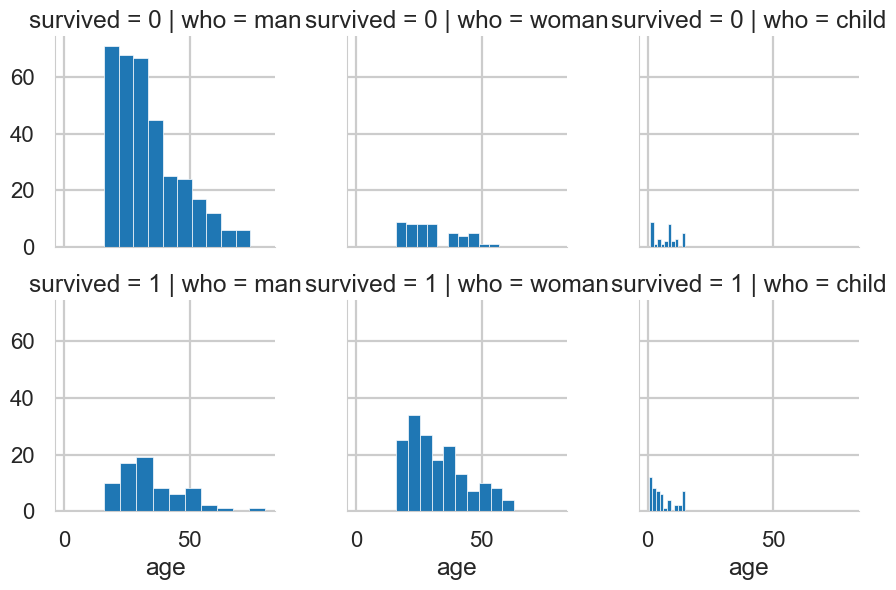

In [94]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived') 

# 그래프 적용하기
g = g.map(plt.hist, 'age')

### 이변수 데이터의 분포

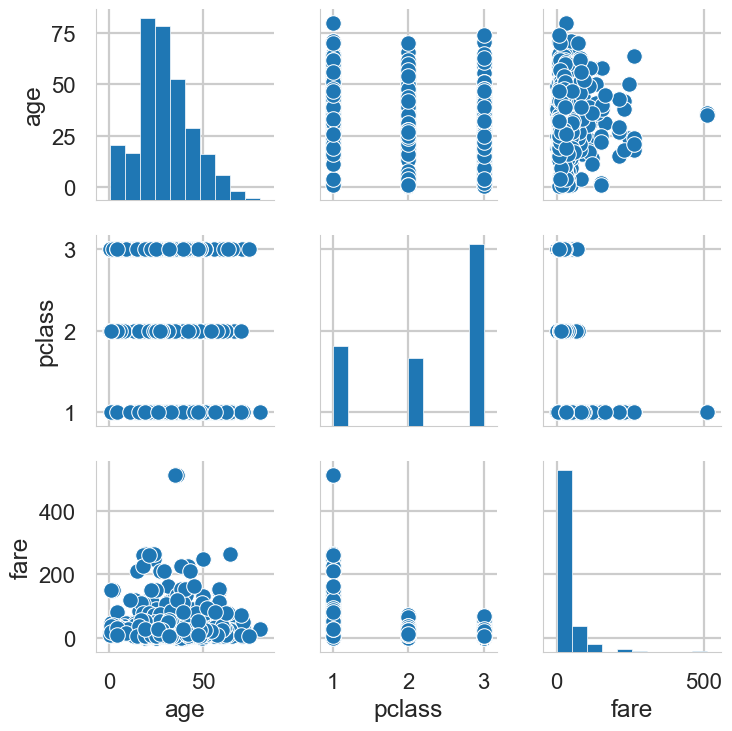

In [95]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass', 'fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

## 3. Folium 라이브러리 - 지도 활용

#### 지도 만들기
* map 함수로 간단히 지도 표현
* zoom과 scroll 가능

In [88]:
# 라이브러리 불러오기
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
seoul_map

#### 지도 스타일 정하기

In [96]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import folium

# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

seoul_map2

In [97]:
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', 
                        zoom_start=15)

seoul_map3

#### 지도에 마커 표시하기

In [99]:
# 대학교 리스트를 데이터프레임 변환
df = pd.read_excel('./서울지역 대학교 위치.xlsx')
df.set_index("Unnamed: 0", inplace=True)
df.head()

,위도,경도
Unnamed: 0,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [100]:
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)

seoul_map

In [101]:
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 대학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,         # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7, # 투명도    
                        popup=name
    ).add_to(seoul_map)

seoul_map

#### 지도 영역에 단계구분도(Choropleth Map) 표시하기

In [102]:
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = './경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분')  
df.columns = df.columns.map(str)
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [103]:
# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = './경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'  

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],               
                 key_on='feature.properties.name',
                 ).add_to(g_map)

g_map